In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Input
# import tkinter as tk
# from datetime import timedelta

In [ ]:
df = pd.read_csv("D:\Python\AI\Dữ liệu Lịch sử VNM (1).csv", parse_dates=['Ngày'], dayfirst=True, thousands=',', decimal='.')
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,2025-04-23,56400.0,56800.0,57200.0,56200.0,3.59M,0.71%
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6.96M,-1.23%
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3.02M,0.18%
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3.04M,1.07%
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7.22M,0.00%
...,...,...,...,...,...,...,...
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729.69K,1.46%
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176.98K,0.00%
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220.82K,0.74%
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161.84K,0.00%


In [ ]:
#convert M L K trong cột KL thành số thực
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        if vol_str[-1] == 'M':
            return float(vol_str[:-1]) * 1_000_000
        elif vol_str[-1] == 'K':
            return float(vol_str[:-1]) * 1_000
    return float(vol_str)

df['KL'] = df['KL'].apply(convert_volume)
df = df.sort_values('Ngày')
df = df.ffill()
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
2941,2013-07-10,94444.0,95139.0,95833.0,94444.0,232110.0,0.00%
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161840.0,0.00%
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220820.0,0.74%
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176980.0,0.00%
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729690.0,1.46%
...,...,...,...,...,...,...,...
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7220000.0,0.00%
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3040000.0,1.07%
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3020000.0,0.18%
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6960000.0,-1.23%


In [ ]:
df['Thứ'] = df['Ngày'].dt.dayofweek
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi,Thứ
2941,2013-07-10,94444.0,95139.0,95833.0,94444.0,232110.0,0.00%,2
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161840.0,0.00%,3
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220820.0,0.74%,4
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176980.0,0.00%,0
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729690.0,1.46%,1
...,...,...,...,...,...,...,...,...
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7220000.0,0.00%,3
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3040000.0,1.07%,4
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3020000.0,0.18%,0
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6960000.0,-1.23%,1


In [ ]:
# Đổi tên các cột thành tiếng Anh cho dễ làm việc
df.rename(columns={
    "Ngày": "Date",
    "Lần cuối": "Close",
    "Mở": "Open",
    "Cao": "High",
    "Thấp": "Low",
    "KL": "Volume",
    "% Thay đổi": "% Change",
    "Thứ": "DayOfWeek"
}, inplace = True)
df

,Date,Close,Open,High,Low,Volume,% Change,DayOfWeek
2941,2013-07-10,94444.0,95139.0,95833.0,94444.0,232110.0,0.00%,2
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161840.0,0.00%,3
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220820.0,0.74%,4
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176980.0,0.00%,0
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729690.0,1.46%,1
...,...,...,...,...,...,...,...,...
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7220000.0,0.00%,3
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3040000.0,1.07%,4
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3020000.0,0.18%,0
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6960000.0,-1.23%,1


In [ ]:
#chắc là %chênh giá mở và đóng, chênh giá đỉnh và sàn
df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']
df['High_Low_Spread'] = (df['High'] - df['Low']) / df['Open']

#xem xu hướng của giá cổ phiếu dựa trên trung bình 15, 10 và 20 ngày gần nhất
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

#xem độ biến động thông qua độ lệch chuẩn của giá 5 ngày
df['Volatility_5'] = df['Close'].rolling(window=5).std()
df['Volume_MA5'] = df['Volume'].rolling(window=5).mean()
df['Volume_Spike'] = (df['Volume'] > 1.5 * df['Volume'].rolling(window=20).mean()).astype(int)

# df.iloc[40:60]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [ ]:
df['Target_5'] = df['Close'].shift(-5)
df['Target_10'] = df['Close'].shift(-10)
df['Target_20'] = df['Close'].shift(-20)
df['Target_50'] = df['Close'].shift(-50)
df['Target_100'] = df['Close'].shift(-100)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Close,Open,High,Low,Volume,% Change,DayOfWeek,Daily_Return,High_Low_Spread,...,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,Target_10,Target_5,Target_20,Target_50,Target_100
2941,2013-07-10,94444.0,95139.0,95833.0,94444.0,232110.0,0.00%,2,-0.007305,0.014600,...,NaN,NaN,NaN,NaN,0,98611.0,97222.0,100694.0,95139.0,98611.0
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161840.0,0.00%,3,0.000000,0.014707,...,NaN,NaN,NaN,NaN,0,99305.0,97222.0,100694.0,95833.0,98611.0
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220820.0,0.74%,4,0.007359,0.014707,...,NaN,NaN,NaN,NaN,0,100000.0,100000.0,100694.0,95139.0,97917.0
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176980.0,0.00%,0,0.000000,0.014600,...,NaN,NaN,NaN,NaN,0,97917.0,100694.0,100694.0,95833.0,98611.0
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729690.0,1.46%,1,0.014600,0.021894,...,NaN,NaN,850.789457,304288.0,0,98611.0,100694.0,102083.0,97222.0,97917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7220000.0,0.00%,3,0.009009,0.032432,...,55980.0,58510.0,650.384502,5952000.0,0,NaN,NaN,NaN,NaN,NaN
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3040000.0,1.07%,4,-0.001764,0.012346,...,55990.0,58250.0,391.152144,4728000.0,0,NaN,NaN,NaN,NaN,NaN
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3020000.0,0.18%,0,-0.001761,0.010563,...,55810.0,58020.0,327.108545,4236000.0,0,NaN,NaN,NaN,NaN,NaN
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6960000.0,-1.23%,1,-0.010601,0.047703,...,55960.0,57750.0,357.770876,4796000.0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_5 = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
#         'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek','Target_5']].dropna()
# X_5 = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
#         'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']]
# y_5 = df['Target_5']

# split_point = int(len(X) * 0.8)
# X_5_train, X_5_test = X.iloc[:split_point], X.iloc[split_point:]
# y_5_train, y_5_test = y.iloc[:split_point], y.iloc[split_point:]

# print(X_5_train.shape, X_5_test.shape)
# df

KeyError: "['Target_5'] not in index"

# Dùng RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 5 ngày

In [ ]:
df_5 = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek','Target_5']].dropna()
X_5 = df_5[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']]
y_5 = df_5['Target_5']

split_point = int(len(X) * 0.8)
X_5_train, X_5_test = X_5.iloc[:split_point], X_5.iloc[split_point:]
y_5_train, y_5_test = y_5.iloc[:split_point], y_5.iloc[split_point:]

print(X_5_train.shape, X_5_test.shape)
X_5_test

(2334, 9) (584, 9)


,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,DayOfWeek
588,-0.012345,0.022222,73442.28,74655.32,73848.130,1689.330273,1864000.0,0,4
587,-0.022416,0.043586,72280.78,74054.52,73673.550,1528.030946,2078000.0,0,0
586,-0.007633,0.027990,71476.68,73287.89,73569.835,1641.362252,2520000.0,1,1
585,-0.023930,0.023930,70583.22,72495.22,73560.280,1302.420280,2856000.0,1,2
584,0.001291,0.024517,69975.68,72066.36,73485.295,909.846227,3056000.0,0,3
...,...,...,...,...,...,...,...,...,...
9,0.000000,0.000000,55420.00,58040.00,59970.000,2409.771773,10286000.0,0,3
8,0.034173,0.050360,55620.00,57680.00,59745.000,2558.710613,8730000.0,1,4
7,-0.017271,0.024180,55300.00,57340.00,59485.000,2180.596249,7870000.0,0,0
6,-0.007055,0.021164,55660.00,56910.00,59150.000,2164.024029,6038000.0,0,1


In [ ]:
model_5 = RandomForestRegressor(n_estimators=100, random_state=42)
model_5.fit(X_5_train, y_5_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model_5.predict(X_5_test)

mse = mean_squared_error(y_5_test, y_pred)
r2 = r2_score(y_5_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 6416412.78
R^2 Score: 0.57


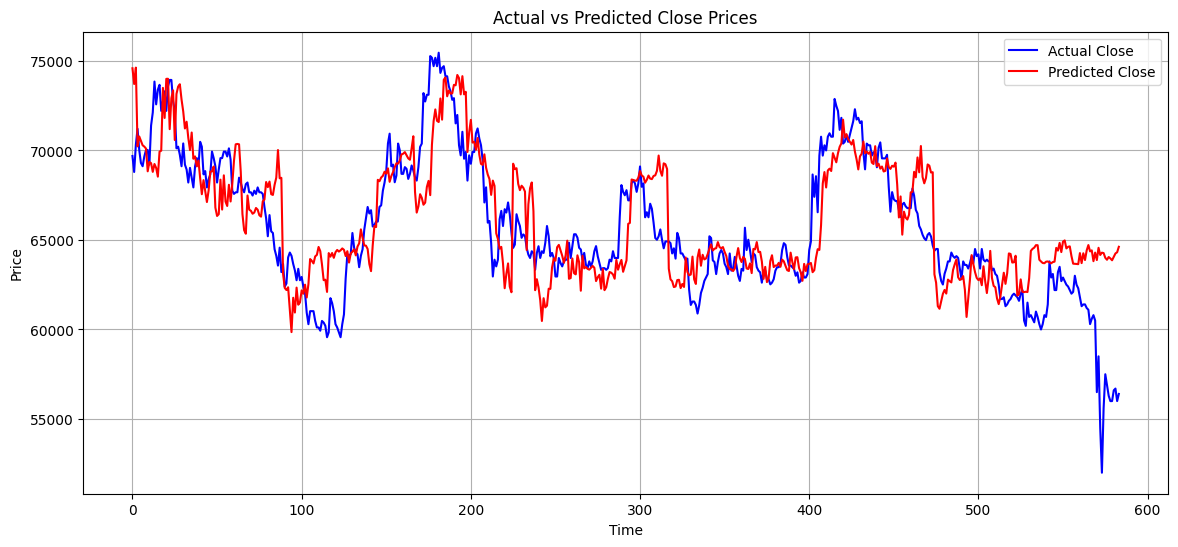

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## 10 ngày

In [ ]:
df_10 = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek','Target_10']].dropna()
X_10 = df_10[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']]
y_10 = df_10['Target_10']

split_point = int(len(X) * 0.8)
X_10_train, X_10_test = X_10.iloc[:split_point], X_10.iloc[split_point:]
y_10_train, y_10_test = y_10.iloc[:split_point], y_10.iloc[split_point:]

print(X_10_train.shape, X_10_test.shape)
X_10_test

(2334, 9) (579, 9)


,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,DayOfWeek
588,-0.012345,0.022222,73442.28,74655.32,73848.130,1689.330273,1864000.0,0,4
587,-0.022416,0.043586,72280.78,74054.52,73673.550,1528.030946,2078000.0,0,0
586,-0.007633,0.027990,71476.68,73287.89,73569.835,1641.362252,2520000.0,1,1
585,-0.023930,0.023930,70583.22,72495.22,73560.280,1302.420280,2856000.0,1,2
584,0.001291,0.024517,69975.68,72066.36,73485.295,909.846227,3056000.0,0,3
...,...,...,...,...,...,...,...,...,...
14,-0.003295,0.014827,60660.00,61040.00,61750.000,304.959014,4154000.0,0,2
13,-0.050420,0.055462,59740.00,60510.00,61430.000,1820.164828,7096000.0,1,3
12,0.083333,0.092593,59380.00,60230.00,61220.000,1859.300944,7966000.0,1,4
11,-0.038801,0.042328,58160.00,59540.00,60820.000,2679.178979,9570000.0,1,1


In [ ]:
model_10 = RandomForestRegressor(n_estimators=100, random_state=42)
model_10.fit(X_10_train, y_10_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model_10.predict(X_10_test)

mse = mean_squared_error(y_10_test, y_pred)
r2 = r2_score(y_10_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 10672988.84
R^2 Score: 0.28


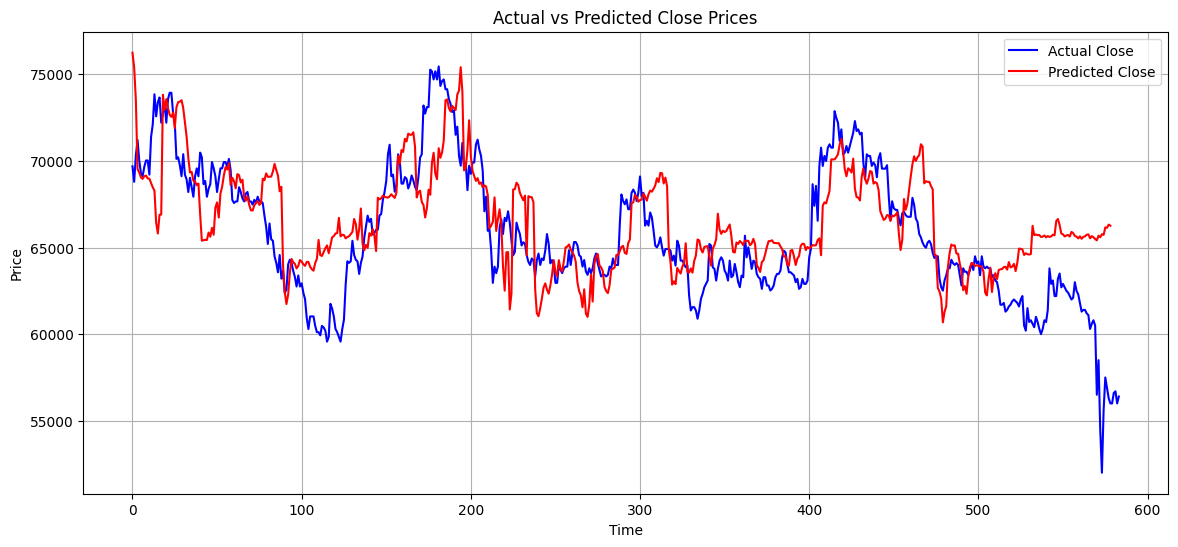

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## 20 ngày

In [ ]:
df_20 = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek','Target_20']].dropna()
X_20 = df_20[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']]
y_20 = df_20['Target_20']

split_point = int(len(X) * 0.8)
X_20_train, X_20_test = X_20.iloc[:split_point], X_20.iloc[split_point:]
y_20_train, y_20_test = y_20.iloc[:split_point], y_20.iloc[split_point:]

print(X_20_train.shape, X_20_test.shape)
X_20_test

(2334, 9) (569, 9)


,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,DayOfWeek
588,-0.012345,0.022222,73442.28,74655.32,73848.130,1689.330273,1864000.0,0,4
587,-0.022416,0.043586,72280.78,74054.52,73673.550,1528.030946,2078000.0,0,0
586,-0.007633,0.027990,71476.68,73287.89,73569.835,1641.362252,2520000.0,1,1
585,-0.023930,0.023930,70583.22,72495.22,73560.280,1302.420280,2856000.0,1,2
584,0.001291,0.024517,69975.68,72066.36,73485.295,909.846227,3056000.0,0,3
...,...,...,...,...,...,...,...,...,...
24,-0.006380,0.014354,62380.00,62460.00,62515.000,396.232255,3636000.0,0,2
23,-0.006431,0.014469,62340.00,62350.00,62570.000,450.555213,3394000.0,0,3
22,-0.008091,0.009709,62180.00,62210.00,62565.000,653.452370,3520000.0,0,4
21,0.000000,0.014658,61860.00,62100.00,62445.000,531.977443,3206000.0,0,0


In [ ]:
model_20 = RandomForestRegressor(n_estimators=100, random_state=42)
model_20.fit(X_20_train, y_20_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model_20.predict(X_20_test)

mse = mean_squared_error(y_20_test, y_pred)
r2 = r2_score(y_20_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 16617827.91
R^2 Score: -0.15


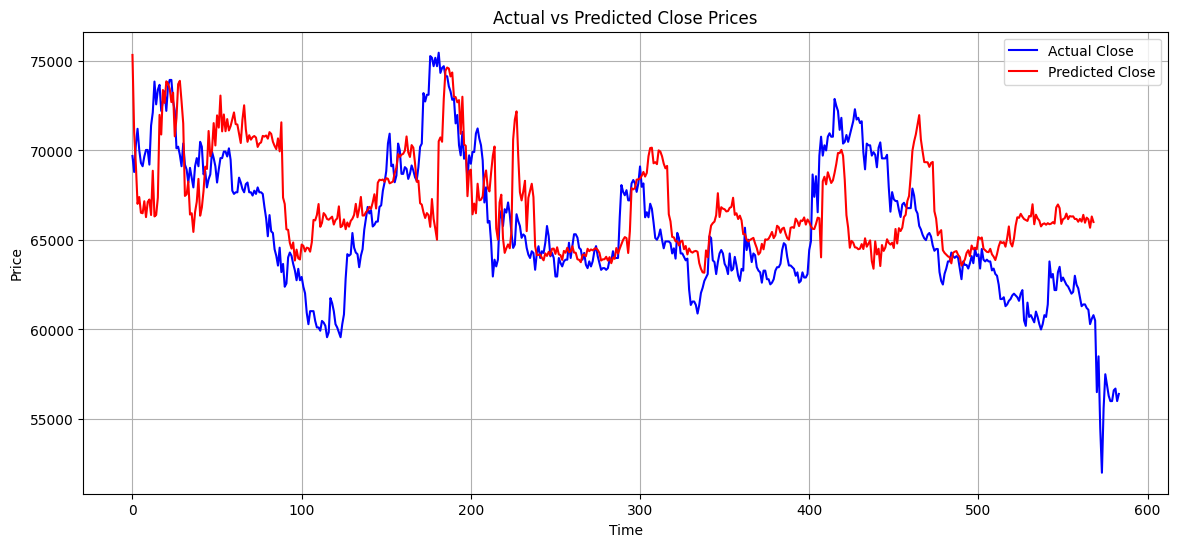

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Dùng XGBoost 

In [ ]:
# df['Close_lag_1'] = df['Close'].shift(1)
# df['Close_lag_2'] = df['Close'].shift(2)
# df['Close_lag_3'] = df['Close'].shift(3)
# df_XG = df.dropna()
# df_XG

,Date,Close,Open,High,Low,Volume,% Change,DayOfWeek,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,Target,Close_lag_1,Close_lag_2,Close_lag_3
2919,2013-08-09,100694.0,100694.0,101389.0,100000.0,229060.0,0.00%,4,0.000000,0.013794,100694.2,100277.6,99409.55,491.085736,364522.0,0,104167.0,100694.0,100694.0,101389.0
2918,2013-08-12,100694.0,101389.0,101389.0,100694.0,167410.0,0.00%,0,-0.006855,0.006855,100833.0,100555.3,99687.30,310.813449,290932.0,0,104167.0,100694.0,100694.0,100694.0
2917,2013-08-13,102083.0,100694.0,102083.0,100694.0,307120.0,1.38%,1,0.013794,0.013794,100971.8,100902.5,99965.05,621.179684,268540.0,0,101389.0,100694.0,100694.0,100694.0
2916,2013-08-14,103472.0,102083.0,103472.0,101389.0,296780.0,1.36%,2,0.013607,0.020405,101527.4,101180.3,100277.55,1242.359368,243798.0,0,101389.0,102083.0,100694.0,100694.0
2915,2013-08-15,104861.0,104167.0,104861.0,103472.0,372590.0,1.34%,3,0.006662,0.013334,102360.8,101597.0,100659.50,1811.034428,274592.0,0,99305.0,103472.0,102083.0,100694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2025-04-10,55600.0,55600.0,55600.0,55600.0,1510000.0,6.92%,3,0.000000,0.000000,55420.0,58040.0,59970.00,2409.771773,10286000.0,0,56000.0,52000.0,54500.0,58500.0
8,2025-04-11,57500.0,55600.0,58400.0,55600.0,9160000.0,3.42%,4,0.034173,0.050360,55620.0,57680.0,59745.00,2558.710613,8730000.0,1,56600.0,55600.0,52000.0,54500.0
7,2025-04-14,56900.0,57900.0,57900.0,56500.0,5480000.0,-1.04%,0,-0.017271,0.024180,55300.0,57340.0,59485.00,2180.596249,7870000.0,0,56700.0,57500.0,55600.0,52000.0
6,2025-04-15,56300.0,56700.0,57500.0,56300.0,4160000.0,-1.05%,1,-0.007055,0.021164,55660.0,56910.0,59150.00,2164.024029,6038000.0,0,56000.0,56900.0,57500.0,55600.0


In [ ]:
X = df[['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek',
        'Close_lag_1', 'Close_lag_2', 'Close_lag_3']]
y = df['Target']

split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

print(X_train.shape, X_test.shape)
df

(2334, 12) (584, 12)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Close,Open,High,Low,Volume,% Change,DayOfWeek,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,Target,Close_lag_1,Close_lag_2,Close_lag_3
2922,2013-08-06,101389.0,100000.0,102083.0,99305.0,419080.0,1.39%,1,0.013890,0.027780,100833.2,99861.0,98506.80,581.120211,365438.0,0,102083.0,NaN,NaN,NaN
2921,2013-08-07,100694.0,101389.0,101389.0,100694.0,420490.0,-0.69%,2,-0.006855,0.006855,100833.2,100069.3,98819.30,581.120211,378178.0,0,103472.0,101389.0,NaN,NaN
2920,2013-08-08,100694.0,100694.0,101389.0,100000.0,218620.0,0.00%,3,0.000000,0.013794,100833.2,100208.2,99131.80,581.120211,369088.0,0,104861.0,100694.0,101389.0,NaN
2919,2013-08-09,100694.0,100694.0,101389.0,100000.0,229060.0,0.00%,4,0.000000,0.013794,100694.2,100277.6,99409.55,491.085736,364522.0,0,104167.0,100694.0,100694.0,101389.0
2918,2013-08-12,100694.0,101389.0,101389.0,100694.0,167410.0,0.00%,0,-0.006855,0.006855,100833.0,100555.3,99687.30,310.813449,290932.0,0,104167.0,100694.0,100694.0,100694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2025-04-10,55600.0,55600.0,55600.0,55600.0,1510000.0,6.92%,3,0.000000,0.000000,55420.0,58040.0,59970.00,2409.771773,10286000.0,0,56000.0,52000.0,54500.0,58500.0
8,2025-04-11,57500.0,55600.0,58400.0,55600.0,9160000.0,3.42%,4,0.034173,0.050360,55620.0,57680.0,59745.00,2558.710613,8730000.0,1,56600.0,55600.0,52000.0,54500.0
7,2025-04-14,56900.0,57900.0,57900.0,56500.0,5480000.0,-1.04%,0,-0.017271,0.024180,55300.0,57340.0,59485.00,2180.596249,7870000.0,0,56700.0,57500.0,55600.0,52000.0
6,2025-04-15,56300.0,56700.0,57500.0,56300.0,4160000.0,-1.05%,1,-0.007055,0.021164,55660.0,56910.0,59150.00,2164.024029,6038000.0,0,56000.0,56900.0,57500.0,55600.0


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(
    n_estimators=500, 
    random_state=42,
    learning_rate=0.6,
    max_depth=5,
    reg_alpha=0.4,
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 9374628.83
R^2 Score: 0.37


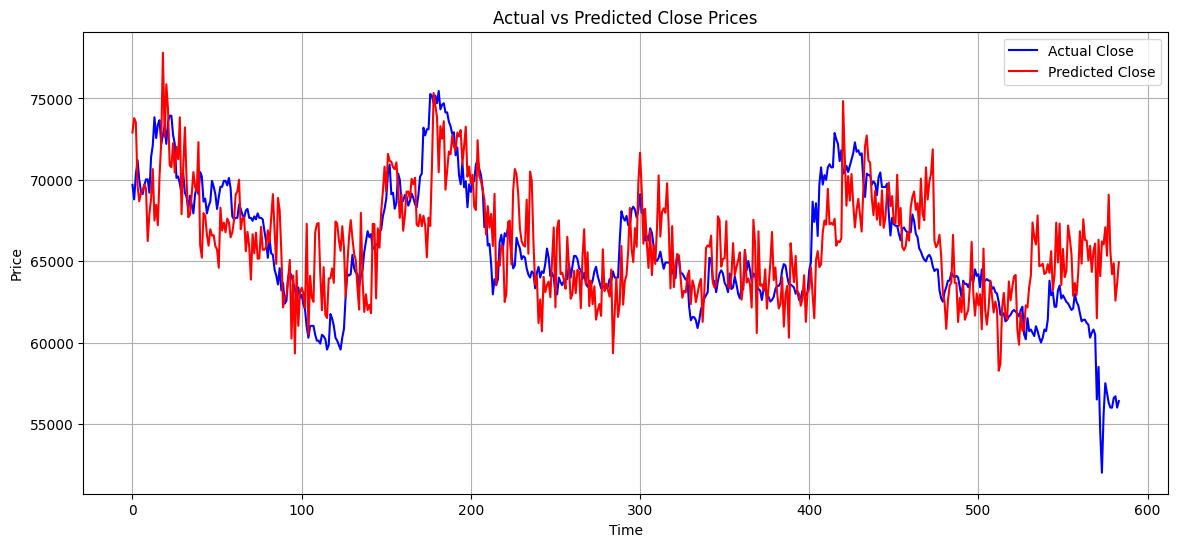

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()